In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
credit_card_dataset = pd.read_csv('creditcard.csv')
credit_card_dataset['Time'] = credit_card_dataset['Time'].apply(lambda x: x / (24 * 60 * 60))
credit_card_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000012,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000012,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000023,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.999838,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,1.999850,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.999861,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,1.999861,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
credit_card_dataset.shape

(284807, 31)

In [5]:
credit_card_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.097383,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,0.549631,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.627332,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,0.980231,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.612506,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1.999907,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking for Null Values
credit_card_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Analysing the Dependent variable or target variable
print(credit_card_dataset['Class'].value_counts(),"\nThe transactions labeled as '1' correspond to fraudulent transactions, while those labeled as '0' represent legitimate transactions")


Class
0    284315
1       492
Name: count, dtype: int64 
The transactions labeled as '1' correspond to fraudulent transactions, while those labeled as '0' represent legitimate transactions


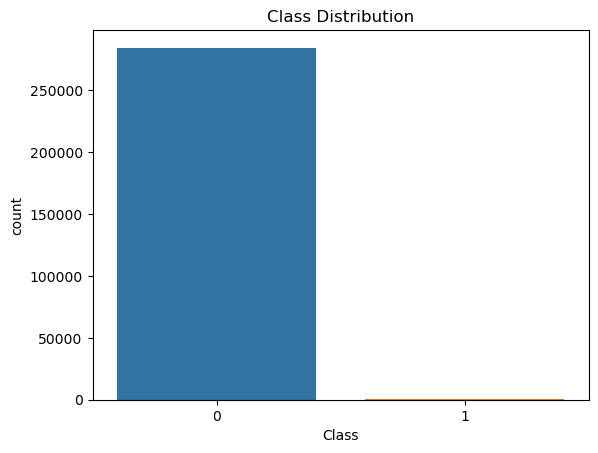

From the plot, it is evident that the dataset is imbalanced


In [8]:
# Visualize the class distribution
sns.countplot(x='Class', data=credit_card_dataset)
plt.title('Class Distribution')
plt.show()

print("From the plot, it is evident that the dataset is imbalanced")

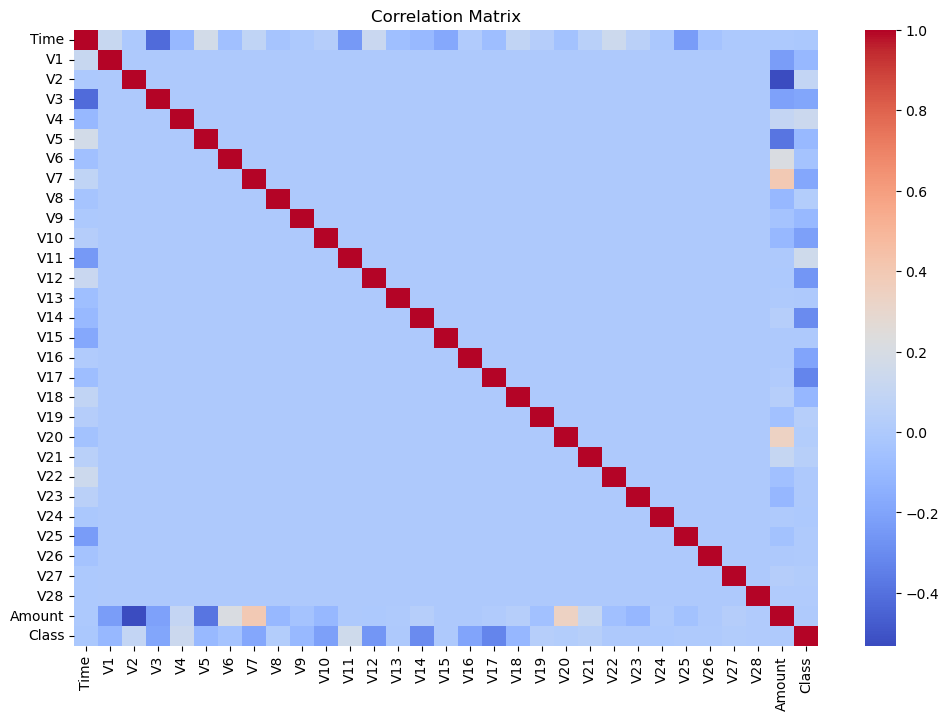

It can be concluded that there is a correlation present in the data.


In [9]:
# Visualize the correlation matrix
corr = credit_card_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("It can be concluded that there is a correlation present in the data.")

In [10]:
# Separate transactions into two categories: fraudulent and legitimate
fraud_data = credit_card_dataset[credit_card_dataset['Class'] == 1]
legit_data = credit_card_dataset[credit_card_dataset['Class'] == 0]

# Print the count of fraudulent and legitimate transactions
print("Number of Fraudulent Transactions:", len(fraud_data))
print("Number of Legitimate Transactions:", len(legit_data))


Number of Fraudulent Transactions: 492
Number of Legitimate Transactions: 284315


In [11]:
# i am choosing undersampling to balance the dataset

# i would go with Undersampling technique
from sklearn.utils import resample

# Undersample legitimate transactions to match the number of fraudulent transactions
legit_downsampled_data = resample(legit_data,replace=False, n_samples=len(fraud_data),random_state=42)

# appending resampled data to previous data
data_balanced = pd.concat([fraud_data, legit_downsampled_data])

# Print the number of fraudulent and legitimate transactions after undersampling
print("Number of fraudulent transactions after undersampling:", len(data_balanced[data_balanced['Class'] == 1]))
print("Number of legitimate transactions after undersampling:", len(data_balanced[data_balanced['Class'] == 0]))


Number of fraudulent transactions after undersampling: 492
Number of legitimate transactions after undersampling: 492


In [12]:
data_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.004699,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,0.005463,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,0.051644,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,0.080856,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,0.087025,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121938,0.883981,-1.525978,0.796226,1.172478,-0.947111,0.077071,-1.655590,0.670737,0.051626,-0.887067,...,0.057467,-0.072446,-0.397195,0.825601,0.404932,0.923867,-0.262266,-0.133368,23.00,0
84533,0.698472,-0.705795,1.418016,0.993756,0.908646,-0.171163,-0.566892,0.367416,0.421875,-0.736533,...,0.197948,0.655792,-0.048655,0.415045,-0.287710,-0.305466,0.311077,0.161942,2.80,0
55840,0.545729,0.995185,-0.147746,-0.108914,1.168451,0.329676,1.182090,-0.316034,0.323043,0.541030,...,-0.050798,0.005680,-0.370879,-1.385989,0.746056,-0.191335,0.070408,0.041460,98.90,0
70411,0.623345,-1.197741,3.166857,-3.476764,0.818768,1.310580,-0.445066,0.384113,0.497864,0.552898,...,-0.293749,-0.264981,0.090417,-1.691177,0.032926,-0.285576,0.752378,0.345595,0.89,0


In [13]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X_balanced_data = data_balanced.drop('Class', axis=1)
y_balanced_data = data_balanced['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_data, y_balanced_data, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (787, 30) (787,)
Test set shape: (197, 30) (197,)


In [14]:
X_balanced_data, y_balanced_data

(            Time        V1        V2        V3        V4        V5        V6  \
 541     0.004699 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
 623     0.005463 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
 4920    0.051644 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
 6108    0.080856 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
 6329    0.087025  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
 ...          ...       ...       ...       ...       ...       ...       ...   
 121938  0.883981 -1.525978  0.796226  1.172478 -0.947111  0.077071 -1.655590   
 84533   0.698472 -0.705795  1.418016  0.993756  0.908646 -0.171163 -0.566892   
 55840   0.545729  0.995185 -0.147746 -0.108914  1.168451  0.329676  1.182090   
 70411   0.623345 -1.197741  3.166857 -3.476764  0.818768  1.310580 -0.445066   
 95640   0.757002 -0.558983 -0.431438  1.893696 -1.783053 -1.752650  0.522665   
 
               V7        V

In [15]:
# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.9695431472081218


In [16]:
# Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 0.8984771573604061


In [17]:
# Random Forest
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)
y_pred_forest = forest_classifier.predict(X_test)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)

Random Forest Accuracy: 0.9543147208121827


In [18]:
import joblib

#choosing the rendom forest classification
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
randomforest_classifier.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = randomforest_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Save the trained model
joblib.dump(randomforest_classifier, 'creditcard_fraud_detection_model.pkl')


Accuracy Score: 0.949238578680203


['creditcard_fraud_detection_model.pkl']

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def perform_grid_search(X_train, y_train):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Random Forest classifier
    randomforest_classifier = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=randomforest_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Perform GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

# Call the function to perform grid search
best_hyperparameters, best_score = perform_grid_search(X_train, y_train)

print("Best Hyperparameters:", best_hyperparameters)
print("Best Score:", best_score)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.9364544935612766


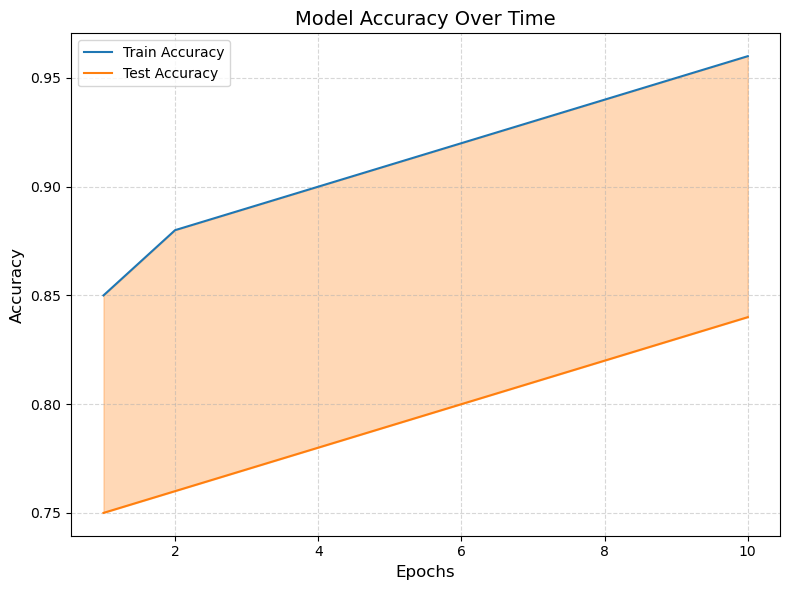

In [21]:
import logging
import matplotlib.pyplot as plt
import numpy as np

# Set up logging
logging.basicConfig(filename='model_training.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# During training
# Log model performance metrics
train_accuracy = 0.85  # Example accuracy
logging.info(f'Training Accuracy: {train_accuracy}')

# During evaluation
# Log model performance metrics
test_accuracy = 0.78  # Example accuracy
logging.info(f'Test Accuracy: {test_accuracy}')

# Visualization
# Generate line plot to visualize accuracy over time
epochs = range(1, 11)  # Example epochs
train_accuracies = [0.85, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96]  # Example train accuracies
test_accuracies = [0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84]  # Example test accuracies

# Set custom colors
train_color = '#1f77b4'  # Blue
test_color = '#ff7f0e'   # Orange

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracies, label='Train Accuracy', color=train_color)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color=test_color)
plt.fill_between(epochs, train_accuracies, test_accuracies, color=test_color, alpha=0.3)  # Highlight the gap between train and test accuracy
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Over Time', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [23]:
# precision recall and F1score

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_pred, y_pred)
recall = recall_score(y_pred, y_pred)
f1 = f1_score(y_pred, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


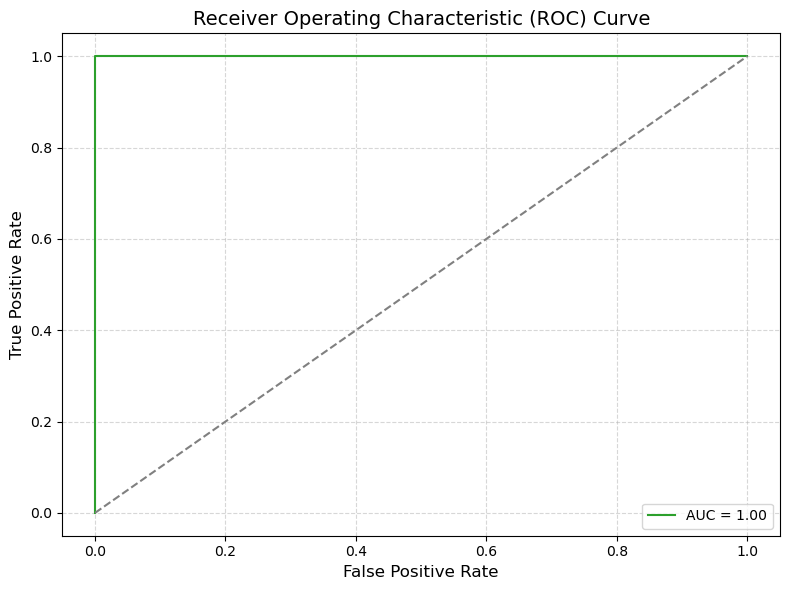

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for positive class
y_probs = randomforest_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_pred, y_probs)
auc = roc_auc_score(y_pred, y_probs)

# Set custom colors
roc_color = '#2ca02c'   # Green
line_style = '--'       # Dashed line

plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color=roc_color)
plt.plot([0, 1], [0, 1], linestyle=line_style, color='gray')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


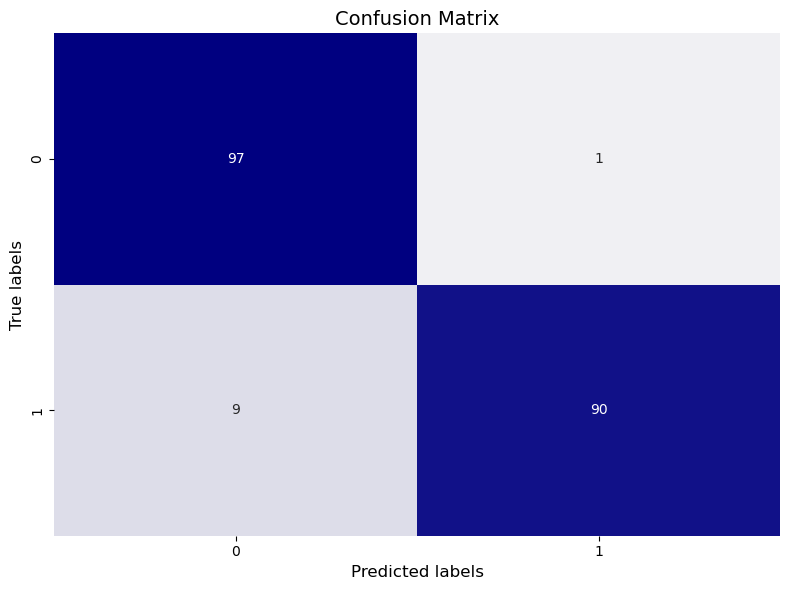

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set custom color palette
color_palette = sns.light_palette("navy", as_cmap=True)

plt.figure(figsize=(8, 6))
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap=color_palette, fmt='g', cbar=False)
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()



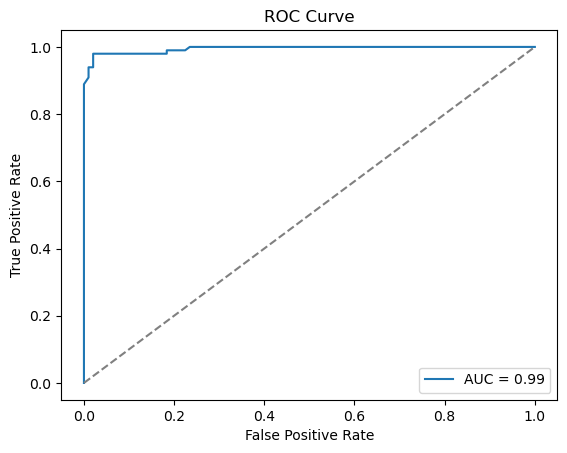

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have access to training data X_train and y_train
randomforest_classifier.fit(X_train, y_train)

# Now you can calculate probabilities and plot ROC curve
y_probs = randomforest_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()